# Multiperceptrón
---
**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [6]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Carga e Inspección de Datos

    LeftWeight   LeftDist   RightWeight   RightDist  Balance
0            1          1             1           1        B
1            1          1             1           2        R
2            1          1             1           3        R
3            1          1             1           4        R
4            1          1             1           5        R
5            1          1             2           1        R
6            1          1             2           2        R
7            1          1             2           3        R
8            1          1             2           4        R
9            1          1             2           5        R
10           1          1             3           1        R
11           1          1             3           3        R


<Axes: >

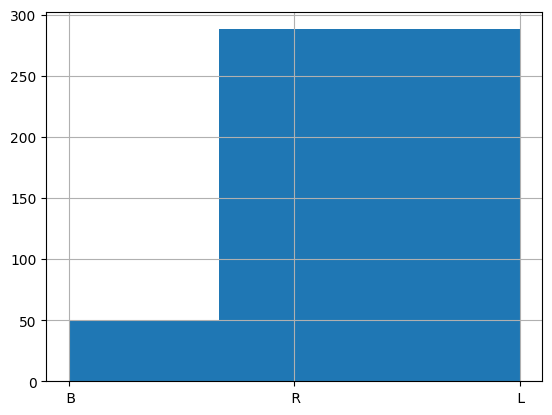

In [7]:
import pandas as pd      # para trabajar con archivos de datos csv, excel
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

nombre_archivo = DATOS_DIR + 'Balance.csv' # archivo de hojas

df = pd.read_csv(nombre_archivo)

# Para hacer una inspección rápida de los datos
print(df.head(12))

#print(df.describe())
df[' Balance'].hist(bins=3)

### Selección de atributos y target

In [8]:
# %% separa atributos y clases
X_raw = np.array(df.iloc[:,0:-1])  # recupera todas las columnas salvo la primera (es la clase)
Y_raw = np.array(df.iloc[:,-1])    # recupera solo la última columna (es la clase)

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
Y_raw = binarizer.fit_transform(Y_raw)
# Y_raw==pd.get_dummies(df[' Balance']).to_numpy() # forma alternativa para codificar

print('Las clases del dataset son :', binarizer.classes_)
print(Y_raw)

# %% Separa ejemplos para enternamiento y testeo
TEST_SIZE = 0.3 # proporcion entre testeo entre entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_raw, Y_raw, test_size=TEST_SIZE)#, random_state=42)
print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_train), len(Y_test) ))

# Escala los atributos de los ejemplo
scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()

X_train  = scaler.fit_transform( X_train )
X_test   = scaler.transform( X_test )

Las clases del dataset son : [' B' ' L' ' R']
[[1 0 0]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]

Datos de Entrenamiento: 437   Datos de Testeo: 188


### Entrenamiento y Evaluación del Modelo

In [9]:
FunH = 'tanh'   # opciones: identity logistic tanh relu
ocultas = (8, 4)

alfa = 0.005
CotaError = 1.0e-4
MAX_ITE = 2500

modelo = MLPClassifier(max_iter=MAX_ITE, hidden_layer_sizes=ocultas, alpha=alfa,
                       solver='adam', #esto lo veremos más adelante
                       activation=FunH, tol=CotaError,
                       verbose=False #esto dice que no se muestra información mientras se va entrenando el modelo
                      ).fit(X_train, Y_train)

#LO MALO ES QUE LE PONEMOS LA MISMA FUNCIÓN DE ACTIVACIÓN PARA TODAS LAS CAPAS, COSA QUE NO PASA CON TENSOR FLOW

#  ########### Medición del entrenamiento ######################
Y_pred = modelo.predict(X_train)
score = modelo.score(X_train, Y_train)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_train)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f' % (score) )


Efectividad: 100.00%
      Score:   1.00


### Evaluación del Modelo con Datos de Prueba

In [10]:
#  ########### Medición del testeo ######################
Y_pred = modelo.predict(X_test)
score = modelo.score(X_test, Y_test)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_test)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f' % (score) )

Efectividad:  95.74%
      Score:   0.94
